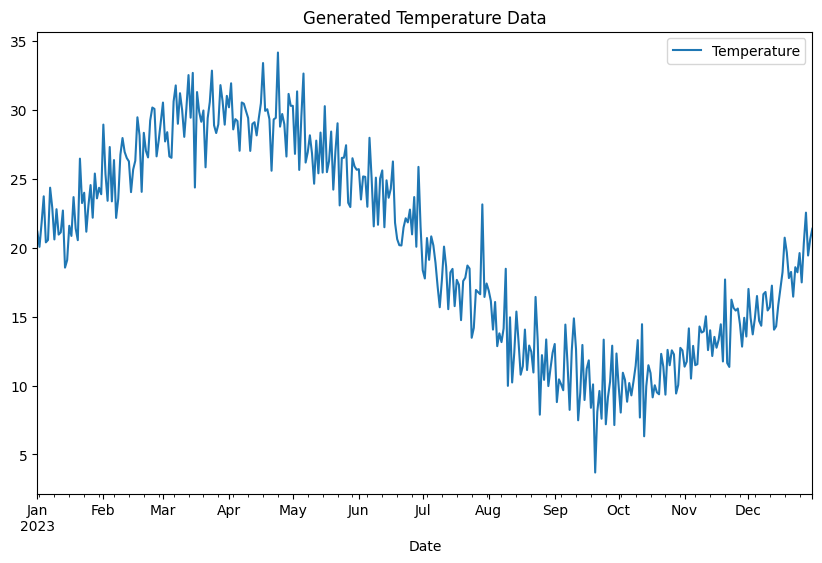

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate daily data for one year (365 days)
np.random.seed(42)
days = pd.date_range('2023-01-01', periods=365, freq='D')
# Simulating temperature with a sine wave and adding some noise
temperature = 20 + 10 * np.sin(2 * np.pi * days.dayofyear / 365) + np.random.normal(0, 2, size=365)

# Create DataFrame
df = pd.DataFrame({'Date': days, 'Temperature': temperature})
df.set_index('Date', inplace=True)

# Visualize the synthetic time series data
df.plot(figsize=(10, 6), title='Generated Temperature Data')
plt.show()


In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any) using forward-fill method
df.fillna(method='ffill', inplace=True)


Temperature    0
dtype: int64


/var/folders/nh/xwjzchhs26b2g_tvt7fqtqtw0000gn/T/ipykernel_16031/274649247.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


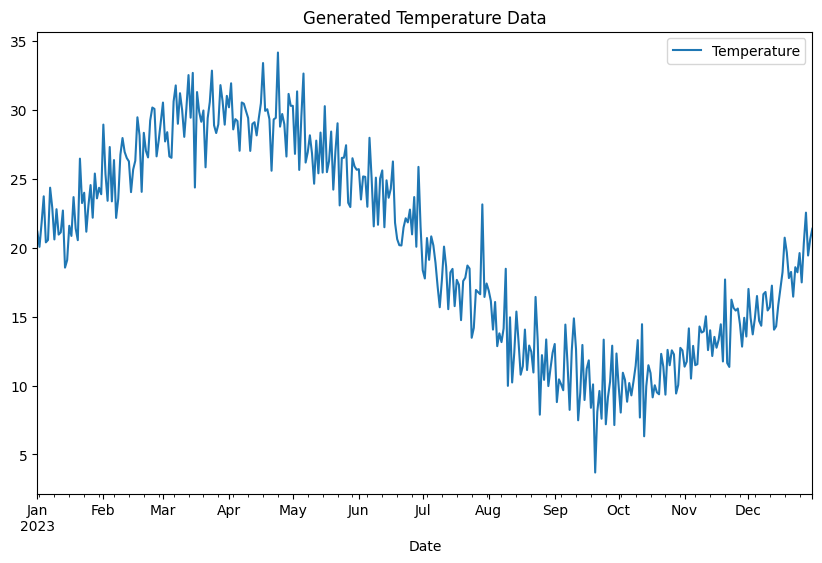

In [3]:
# Visualize the synthetic time series data
df.plot(figsize=(10, 6), title='Generated Temperature Data')
plt.show()

In [5]:
df

,Temperature
Date,
2023-01-01,21.165562
2023-01-02,20.067688
2023-01-03,21.811574
2023-01-04,23.734084
2023-01-05,20.391341
...,...
2023-12-27,20.350669
2023-12-28,22.549281
2023-12-29,19.438264


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Temperature_scaled'] = scaler.fit_transform(df[['Temperature']])


In [7]:
df

,Temperature,Temperature_scaled
Date,,
2023-01-01,21.165562,0.158240
2023-01-02,20.067688,0.006601
2023-01-03,21.811574,0.247467
2023-01-04,23.734084,0.513003
2023-01-05,20.391341,0.051304
...,...,...
2023-12-27,20.350669,0.045687
2023-12-28,22.549281,0.349359
2023-12-29,19.438264,-0.080335


In [8]:
# Split data into features (X) and target (y)
X = df.index.values.reshape(-1, 1)  # Convert the date index to numeric values
y = df['Temperature_scaled'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f'Training Set Size: {len(X_train)}')
print(f'Test Set Size: {len(X_test)}')


Training Set Size: 292
Test Set Size: 73


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.6749093241141241


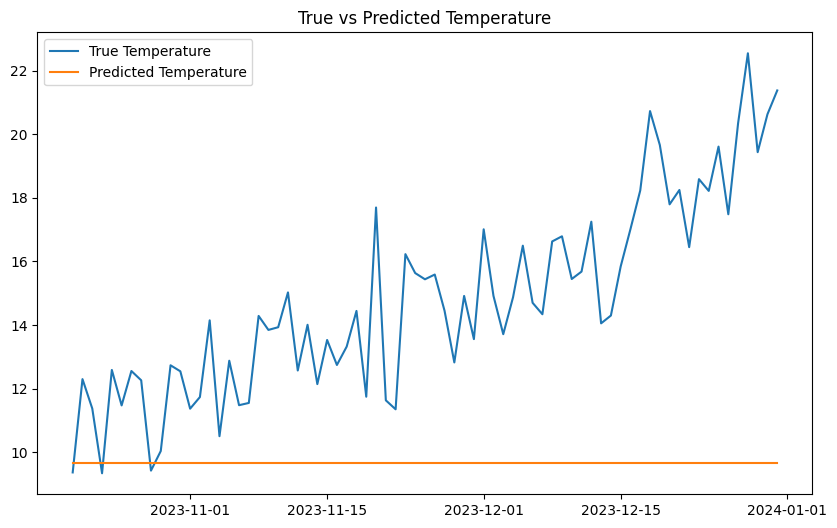

In [10]:
# Inverse transform the scaled predictions and true values
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Create a DataFrame for plotting
results = pd.DataFrame({'Date': df.index[-len(y_test):], 'True_Temperature': y_test_orig.flatten(), 'Predicted_Temperature': y_pred_orig.flatten()})
results.set_index('Date', inplace=True)

# Plot the true values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['True_Temperature'], label='True Temperature')
plt.plot(results.index, results['Predicted_Temperature'], label='Predicted Temperature')
plt.title('True vs Predicted Temperature')
plt.legend()
plt.show()


In [11]:
# Create lag features (e.g., temperature of the previous day)
df['Lag_1'] = df['Temperature_scaled'].shift(1)
df.dropna(inplace=True)

# Update X and y with lagged features
X = df[['Lag_1']].values  # Using the lag feature as input
y = df['Temperature_scaled'].values


In [12]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.18449013124421956


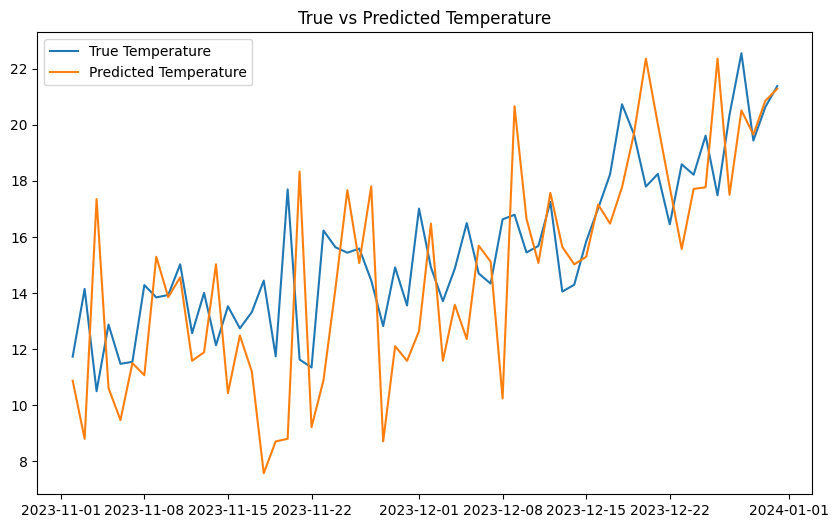

In [14]:
# Inverse transform the scaled predictions and true values
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Create a DataFrame for plotting
results = pd.DataFrame({'Date': df.index[-len(y_test):], 'True_Temperature': y_test_orig.flatten(), 'Predicted_Temperature': y_pred_orig.flatten()})
results.set_index('Date', inplace=True)

# Plot the true values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['True_Temperature'], label='True Temperature')
plt.plot(results.index, results['Predicted_Temperature'], label='Predicted Temperature')
plt.title('True vs Predicted Temperature')
plt.legend()
plt.show()